# Lab 1: Stream cipher based on LFSR

This lab is based on the **pylfsr** package. Information about this package is available here:https://lfsr.readthedocs.io/en/latest/index.html

To install the package use the following commands:
```
. /ubs/soft/anaconda3/varenv
pip install pylfsr
```

## Explore the package if some of the Lab1 commands are unclear.

### Please note that the interpretation of the polynomial is different from that seen in class. 

### The highest order of the polynomial corresponds to the keystream bit and the lowest order (i.e., X^0 = 1) to the feedback bit.

In [5]:
pip install pylfsr

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install --upgrade jupyter ipython matplotlib

  Obtaining dependency information for ipython from https://files.pythonhosted.org/packages/f4/3a/5d8680279ada9571de8469220069d27024ee47624af534e537c9ff49a450/ipython-8.28.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: ipython
    Found existing installation: ipython 8.27.0
    Uninstalling ipython-8.27.0:
      Successfully uninstalled ipython-8.27.0


# Part 1: LFSR study

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pylfsr import LFSR

## 1.1. First exemple p(x) = x^3 + x^2 + 1

This first example shows a 3-bit LFSR with feedback polynomial `x^3 + x^2 + 1` using `pylfsr` package

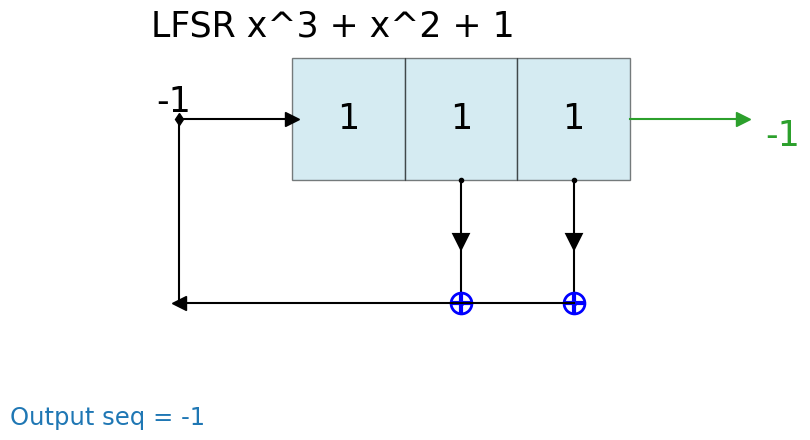

In [11]:
state = [1,1,1] # 3 registers are used for this LFSR. Initialisation state is 1, 1, 1
fpoly = [3,2] # definition of the LFSR feedback polynomial
L = LFSR(fpoly=fpoly,initstate =state, verbose=True)
L.Viz(title='LFSR x^3 + x^2 + 1')

### Question 1: Explain how the LFSR is built using the `pylfsr` package.

The LFRS is composed of three registers as it is initialized by state = [1, 1, 1] . Then the feedback polynomial (x<sup>3</sup> + x<sup>2</sup> + 1) is represented by the list fpoly = [3,2]. The exponents 3 and 2 shows that the feedback taps are on 3rd and 2nd position of the LFSR. These feedback taps determines how the feedback values are calculated. Basically, the feedback values is generated by XORing 3rd and 2nd registers and using this result to shift the the registers. Each step involves shifting all registers to the right and placing new feedback value in the leftmost register. To vizulaize it in the code L.Viz() method is used to visualize the LFSR. All in all, by using the pylfsr package we can simulate this behaviour and observe the generated sequence as well as the internal state transitions.

### Question 2: Manually write down all the states of the LFSR (and the associated output, i.e., the keystream bit) and compare them with the sequence given in the cell below. Do they match?

| Step | State     | Feedback (XOR) | Keystream Bit |
|------|-----------|----------------|---------------|
| 1    | [1, 1, 1] | 1 ⊕ 1 = 0      | 1             |
| 2    | [0, 1, 1] | 1 ⊕ 1 = 0      | 1             |
| 3    | [0, 0, 1] | 1 ⊕ 0 = 1      | 1             |
| 4    | [1, 0, 0] | 0 ⊕ 0 = 0      | 0             |
| 5    | [0, 1, 0] | 0 ⊕ 1 = 1      | 0             |
| 6    | [1, 0, 1] | 1 ⊕ 0 = 1      | 1             |
| 7    | [1, 1, 0] | 0 ⊕ 1 = 1      | 0             |
| 8    | [1, 1, 1] | 1 ⊕ 1 = 0      | (Repeats)     |


In [16]:
L.runFullPeriod()

S:  [1 1 1]
S:  [0 1 1]
S:  [0 0 1]
S:  [1 0 0]
S:  [0 1 0]
S:  [1 0 1]
S:  [1 1 0]


array([1, 1, 1, 0, 0, 1, 0])

## 1.2. Second exemple p(x) = x^5 + x^2 + 1

This second example shows a 5-bit LFSR with feedback polynomial  `x^5 + x^2 + 1` **(default polynomial in `pylfsr` package)**

**Execute the cell and analyze the structure of the LFSR and its inital state.**

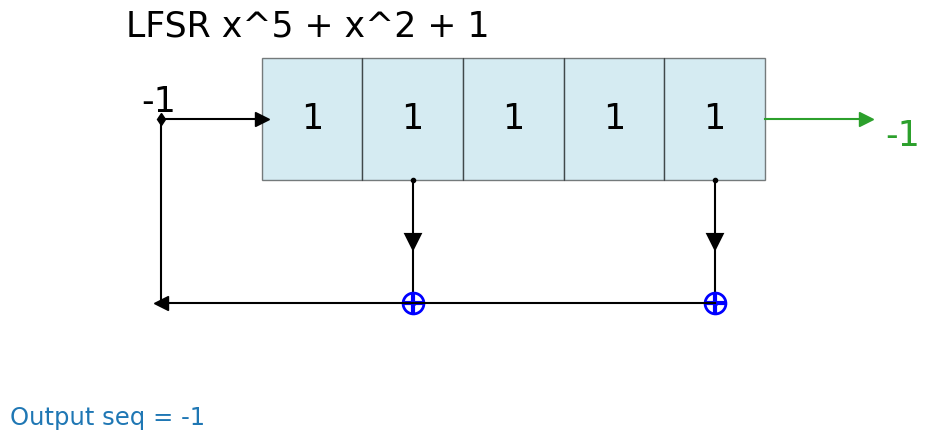

In [19]:
L = LFSR()
L.Viz(show=False, show_labels=False,title='LFSR x^5 + x^2 + 1')


### Question 3: Run one cycle using the `.next` command and analyze the new output. Is it the expected evolution?

In [21]:
L.next()

1

When perfoming the XOR the leftmost register is will update by 0, and the keystream bit, which is the output of rightmost register, is 1. Yes it is expected that the keystream will be 1 as the rightmost bit of the initial state is 1. After calling L.next(), the rightmost bit from the initial state [1, 1, 1, 1, 1] is returned as 1. The LFSR has shifted correctly, and the new state will be [0, 1, 1, 1, 1].

### Question 4: Manually write down the ten first states of the LFSR starting from the initial state (and the associated output, i.e., the keystream bit) and compare with the sequence given in the cell below. Do they match?

| Step | State           | Feedback (XOR) | Keystream Bit |
|------|-----------------|----------------|----------------|
| 1    | [1, 1, 1, 1, 1] | 1 ⊕ 1 = 0      | 1              |
| 2    | [0, 1, 1, 1, 1] | 1 ⊕ 1 = 0      | 1              |
| 3    | [0, 0, 1, 1, 1] | 1 ⊕ 0 = 1      | 1              |
| 4    | [1, 0, 0, 1, 1] | 1 ⊕ 0 = 1      | 1              |
| 5    | [1, 1, 0, 0, 1] | 1 ⊕ 1 = 0      | 1              |
| 6    | [0, 1, 1, 0, 0] | 0 ⊕ 1 = 1      | 0              |
| 7    | [1, 0, 1, 1, 0] | 0 ⊕ 0 = 0      | 0              |
| 8    | [0, 1, 0, 1, 1] | 1 ⊕ 1 = 0      | 1              |
| 9    | [0, 0, 1, 0, 1] | 1 ⊕ 0 = 1      | 1              |
| 10   | [1, 0, 0, 1, 0] | 1 ⊕ 1 = 0      | 0              |

Yes when we compare our result <b>1111100110</b> with the cell bello output they match. Output Sequence: <b>1111100110</b>1001000010101110110001

In [25]:
L.runFullPeriod()
L.info()

5-bit LFSR with feedback polynomial  x^5 + x^2 + 1 with
Expected Period (if polynomial is primitive) =  31
Computing configuration is set to Fibonacci with output sequence taken from 5-th (-1) register
Current :
 State        :  [0 1 1 1 1]
 Count        :  32
 Output bit   :  1
 feedback bit :  0
 Output Sequence: 11111001101001000010101110110001


## 1.3. Third example p(x) = x^3 + x + 1

This third example shows a 3-bit LFSR with a **primitive feedback polynomial**

In [28]:
L.get_fpolyList(3) #this command provides a non-exhaustive list of primitive polynomials

[[3, 1]]

S:  [1 1 1]
S:  [0 1 1]
S:  [1 0 1]
S:  [0 1 0]
S:  [0 0 1]
S:  [1 0 0]
S:  [1 1 0]


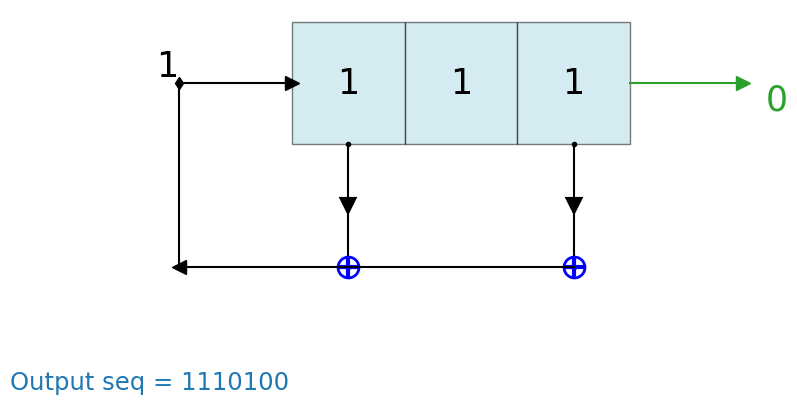

In [29]:
state = [1,1,1] # 3 registers and initialisation state is 1, 1, 1
fpoly = [3,1] # descrption of the polynomial
L = LFSR(fpoly=fpoly,initstate =state, verbose=True)
L.runFullPeriod()
L.Viz(show=False, show_labels=False)

### Question 5: Explain what a primitive polynomial is.

### Question 6: Verify that this polynomial is primitive. In the simulation below how many iterations of the primitive sequence are running?

#### Answer to Question 5
A polynomial P(x) of degree n over a finite field Fq where the q is prime number is called primitive if it is irreducible and its roots generate the multiplicative group of non-zero elements of the field. These polynomials are crusial for constructing LFSRs  because they help in generating maximal-length sequences, which are essential in applications like pseudorandom number generation, cryptography, and error detection/correction.

#### Answer to Question 6
To verify if a polynomial is primitive, we check if it generates the maximum possible number of unique states before repeating. For a 3-bit LFSR, the expected period is 2<sup>3</sup>-1 = 7 if the polynomial is primitive.

Analysis of the Simulation:
The feedback polynomial is x<sup>3</sup>+x+1
The states start repeating after 7 steps.
The sequence length exceeds 7, indicating the polynomial is not primitive. <br>
Prove:
In the simulation, 21 iterations were run, but the polynomial only generates a periodic sequence of length 7.



In [33]:
state = [1,1,1]
fpoly = [3,1]
L = LFSR(initstate=state,fpoly=fpoly)
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(21):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

count 	 state 		outbit 	 seq
--------------------------------------------------
0	[1 1 1]		-1	[-1]
1	[0 1 1]		1	[1]
2	[1 0 1]		1	[1 1]
3	[0 1 0]		1	[1 1 1]
4	[0 0 1]		0	[1 1 1 0]
5	[1 0 0]		1	[1 1 1 0 1]
6	[1 1 0]		0	[1 1 1 0 1 0]
7	[1 1 1]		0	[1 1 1 0 1 0 0]
8	[0 1 1]		1	[1 1 1 0 1 0 0 1]
9	[1 0 1]		1	[1 1 1 0 1 0 0 1 1]
10	[0 1 0]		1	[1 1 1 0 1 0 0 1 1 1]
11	[0 0 1]		0	[1 1 1 0 1 0 0 1 1 1 0]
12	[1 0 0]		1	[1 1 1 0 1 0 0 1 1 1 0 1]
13	[1 1 0]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0]
14	[1 1 1]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0 0]
15	[0 1 1]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1]
16	[1 0 1]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1]
17	[0 1 0]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1]
18	[0 0 1]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0]
19	[1 0 0]		1	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1]
20	[1 1 0]		0	[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0]
--------------------------------------------------
Output:  [1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0]



**The cell below allows a simulation of the LFSR**

In [35]:
import matplotlib.pyplot as plt  # Import pyplot first
plt.close('all')  # Close any existing figures
import matplotlib
matplotlib.use('Agg')  # 1. Use Agg backend
from pylfsr import LFSR
from PIL import Image
import io

# LFSR Initialization (2)
state = [1, 1, 1]
fpoly = [3, 1]
L = LFSR(initstate=state, fpoly=fpoly)

# Figure Setup (3)
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylim([-0.1, None])

# Get Background (4 - Important for Blitting)
fig.canvas.draw()
background = fig.canvas.copy_from_bbox(fig.bbox)

frames = []
for _ in range(22): # 5. Iterate through LFSR states
    ax.clear()  # Clear the axes for the next frame
    L.Viz(ax=ax, title='LFSR x^3 + x^1 + 1') # 6. Visualize LFSR state
    plt.ylim([-0.1, None]) # Set y-axis limits

    # Blitting (7 - Optimization for smoother animation)
    fig.canvas.restore_region(background)
    ax.draw_artist(ax.patch)
    for collection in ax.collections:
        ax.draw_artist(collection)
    for text in ax.texts:
        ax.draw_artist(text)
    fig.canvas.blit(fig.bbox)


    # Convert to PIL Image (8)
    buf = io.BytesIO()
    fig.savefig(buf, format='rgba', dpi='figure') #save figure to buffer
    buf.seek(0)
    width, height = fig.canvas.get_width_height() 
    image = Image.frombuffer("RGBA", (width, height), buf.getvalue(), "raw", "RGBA", 0, 1)
    frames.append(image)

    L.next()  # Advance LFSR to the next state

# Save GIF (9)
frames[0].save('lfsr_simulation.gif', save_all=True, append_images=frames[1:], duration=500, loop=0, optimize=True, disposal=2)

print("GIF saved as 'lfsr_simulation.gif'")
plt.close(fig) # Close figure to free resources

/home/alamon/anaconda3/lib/python3.11/site-packages/pylfsr/pylfsr.py:1308: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  if  show: plt.show()


GIF saved as 'lfsr_simulation.gif'


Simulation can be done on larger LFSR. Below is an example with feedback polynomial: ```x^32 + x^28 + x^19 + x^18 + x^16 + x^14 + x^11 + x^10 + x^9 + x^6 + x^5 + 1```

In [37]:
# LFSR initialization
L = LFSR(initstate=[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
          fpoly=[32, 28, 19, 18, 16, 14, 11, 10, 9, 6, 5, 1],
          counter_start_zero=False)


fig, ax = plt.subplots(figsize=(10, 5))  # Initial figure size
plt.ylim([-0.1, 1.1])

frames = []
for _ in range(35):
    ax.clear()  # Clear the axes
    L.Viz(ax=ax, title='R1')  # Visualize LFSR
    plt.ylim([-0.1, None])

    # Redraw the entire figure for each frame (most robust)
    fig.canvas.draw()  # Redraw everything

    # Convert to PIL Image (efficient and robust method)
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100)  # Use PNG format for better quality
    buf.seek(0)
    image = Image.open(buf)  # Open the image directly from the buffer
    frames.append(image)

    L.next()

# Save the frames as a GIF
frames[0].save('larger_lfsr_visualization.gif', save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)

print("GIF saved as 'larger_lfsr_simulation.gif'")
plt.close(fig)  # Close the figure

GIF saved as 'larger_lfsr_simulation.gif'


# Part 2: LFSR Properties

## 2.1. Feedback Primitive Polynomials

**A primitive polynomial is irreducible, and not trivial to derive**.
A list of primitive polynomials upto 32 degree can be found here: http://www.partow.net/programming/polynomials/index.html (it is not an exhaustive list).

A list of feedback polynomials for a m-bit LFSR can be obtained using ```.get_fpolyList(m)```

In [42]:
# This is an example of generating a primitive polynomial
L = LFSR()
# list of 4-bit feedback polynomials
L.get_fpolyList(4)

[[4, 1]]

**Try different sizes of primitive polynomials to have an idea of possible polynomials**

### Question 7: For m=4, construct a primitive polynomial and a non-primitive polynomial (to construct a non-primitive polynomial just set a polynomial and check if it is primitive or not). Are the numbers of different states identical when building a primitive polynomial and a non-primitive polynomial? What impact it has regarding security when using a non-primitive polynomial?

Except the x^4 + x +1 the rest of the polynomial in the degree 4 are not primitive, because the possible numbers are less by 15 which makes them non-primitive. To prove it the following code will show that:

In [46]:
# This code check ethier your polynomial is primitive or not
import numpy as np

def lfsr_next(state, fpoly):
    outbit = state[-1]
    feedback = 0
    for pos in fpoly:
        feedback ^= state[-pos]

    new_state = np.zeros_like(state)
    new_state[0] = feedback
    new_state[1:] = state[:-1]
    return new_state, outbit

def lfsr_run(initstate, fpoly):
    state = np.array(initstate)
    seq = []
    states_seen = set()
    count = 0

    print('count \t state \t\t outbit \t seq')
    print('-' * 50)

    while tuple(state) not in states_seen:
        print(f"{count}\t {state} \t {state[-1]} \t {seq}")  # Print current state
        states_seen.add(tuple(state))
        state, outbit = lfsr_next(state, fpoly)
        seq.append(outbit)
        count += 1

    print('-' * 50)
    is_primitive = len(states_seen) == (2**len(initstate) - 1)
    print(f'Number of unique states: {len(states_seen)}')
    print(f'Is the polynomial primitive? {"Yes" if is_primitive else "No"}')
    print('Output: ', seq)



# Example usage:
initstate = [1, 1, 1, 1]
fpoly = [4, 1]

lfsr_run(initstate, fpoly)

count 	 state 		 outbit 	 seq
--------------------------------------------------
0	 [1 1 1 1] 	 1 	 []
1	 [0 1 1 1] 	 1 	 [1]
2	 [1 0 1 1] 	 1 	 [1, 1]
3	 [0 1 0 1] 	 1 	 [1, 1, 1]
4	 [1 0 1 0] 	 0 	 [1, 1, 1, 1]
5	 [1 1 0 1] 	 1 	 [1, 1, 1, 1, 0]
6	 [0 1 1 0] 	 0 	 [1, 1, 1, 1, 0, 1]
7	 [0 0 1 1] 	 1 	 [1, 1, 1, 1, 0, 1, 0]
8	 [1 0 0 1] 	 1 	 [1, 1, 1, 1, 0, 1, 0, 1]
9	 [0 1 0 0] 	 0 	 [1, 1, 1, 1, 0, 1, 0, 1, 1]
10	 [0 0 1 0] 	 0 	 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
11	 [0 0 0 1] 	 1 	 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
12	 [1 0 0 0] 	 0 	 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
13	 [1 1 0 0] 	 0 	 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
14	 [1 1 1 0] 	 0 	 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
--------------------------------------------------
Number of unique states: 15
Is the polynomial primitive? Yes
Output:  [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]


The numbers of different states are not identical when using a primitive polynomial versus a non-primitive polynomial. When we use non-primitive polynomial, the shorter cycle length and fewer states reduce the unpredictability of the output sequence, which weakens the security of applications like stream ciphers or pseudorandom number generators.

In contrast, a primitive polynomial maximizes the unpredictability by generating the largest possible number of unique states, making the system more resistant to attacks.

## 2.2. Properties comparison between primitive polynomial and non primitive polynomial

1. Periodicity
------------------
 - Expected period = 2^M-1 = 31
 - Pass?:  True

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period)
 - #1s =  16 	#0s =  15 := 16 = 1 + 15
 - Pass?:  True

3. Runlength Property
-------------------
 - Number of Runs of different lengths in a period should be of specific order, e.g. [4,2,1,1], that is 4 runs of length 1, 2 runs of length 2 and so on ..
 - Runs:  [8 4 2 1 1]
 - Pass?:  True

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else 

 - Rxx(k):  [ 1.    -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032  1.    -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032
 -0.032 -0.032 -0.032 

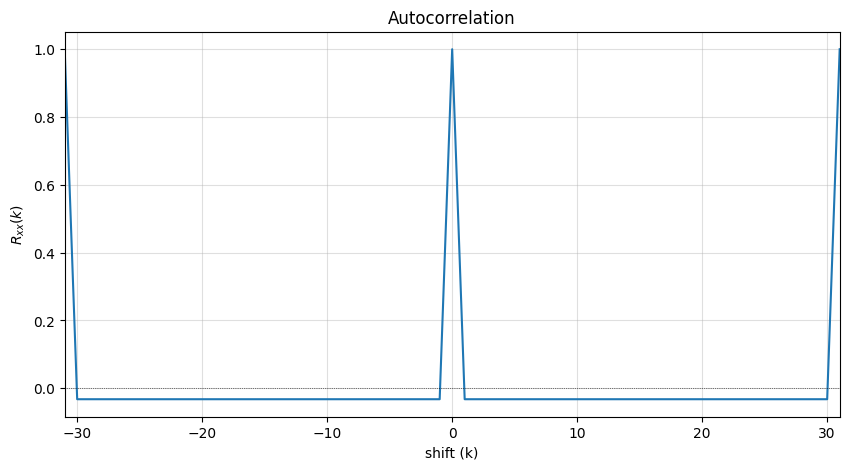

 - Pass?:  True



Passed all the tests


In [49]:
# This is an example of a primitive polynomial
%matplotlib inline
import matplotlib.pyplot as plt


state = [1,1,1,1,0]
fpoly = [5,2]
L = LFSR(initstate=state,fpoly=fpoly)
fig, ax = plt.subplots(figsize=(10,5))
result  = L.test_properties(verbose=2)

### Question 8: Explain all the properties provided by the test_properties function 

1. Periodicity
------------------
 - Expected period = 2^M-1 = 31
 - Pass?:  False

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period)
 - #1s =  17 	#0s =  14 := 17 = 1 + 14
 - Pass?:  False

3. Runlength Property
-------------------
 - Number of Runs of different lengths in a period should be of specific order, e.g. [4,2,1,1], that is 4 runs of length 1, 2 runs of length 2 and so on ..
 - Runs:  [10  2  1  1  2]
 - Pass?:  False

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else 

 - Rxx(k):  [ 1.    -0.032  0.226 -0.161  0.097 -0.032 -0.032 -0.29   0.226 -0.161
  0.355 -0.032 -0.032 -0.032 -0.29  -0.161 -0.161 -0.29  -0.032 -0.032
 -0.032  0.355 -0.161  0.226 -0.29  -0.032 -0.032  0.097 -0.161  0.226
 -0.032  1.    -0.032  0.226 -0.161  0.097 -0.032 -0.032 -0.29   0.226
 -0.161  0.355 -0.032 -0.032 -0.032 -0.29  -0.161 -0.161 -0.29  -0.032
 -0.032 -0.032

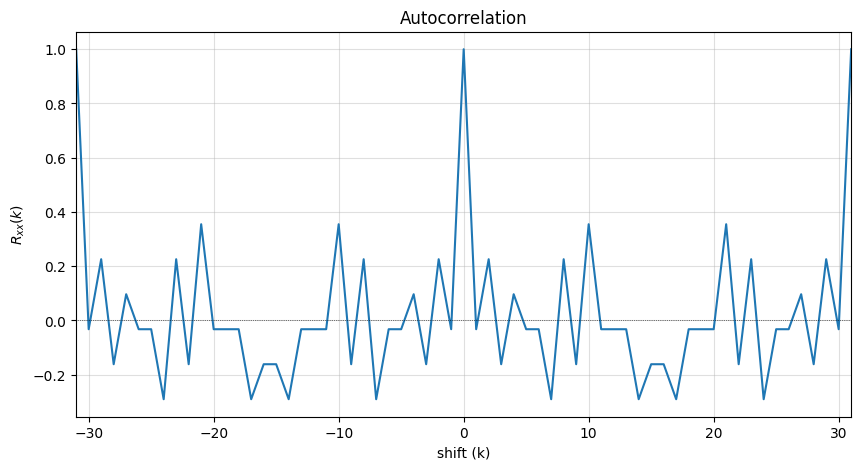

 - Pass?:  False



Failed one or more tests, check if feedback polynomial is primitive polynomial


In [51]:
# This is an example of a non primitive polynomial

state = [1,1,1,1,0]
fpoly = [5,1]
L = LFSR(initstate=state,fpoly=fpoly)
fig, ax = plt.subplots(figsize=(10,5))
result  = L.test_properties(verbose=2)

### Question 9: Explain all the properties provided by the test_properties function and compare with primitive polynomial

# Part 3: Designing a toy stream cipher using LFSR

### Question 10: Build your own stream cipher combining two LFSR with primitive polynomials. The output of the two LFSRs are combined with a Xor operation. Explain you code.
* On the sender side (ALICE Side) encrypt a message using the generated keystream
* Then, on the receiver side (BOB Side) decrypt the message and check if the original message is retrieved

Original Message: Bonjour, Bob!
Encrypted Message (bits): [0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1]
Decrypted Message: Bonjour, Bob!


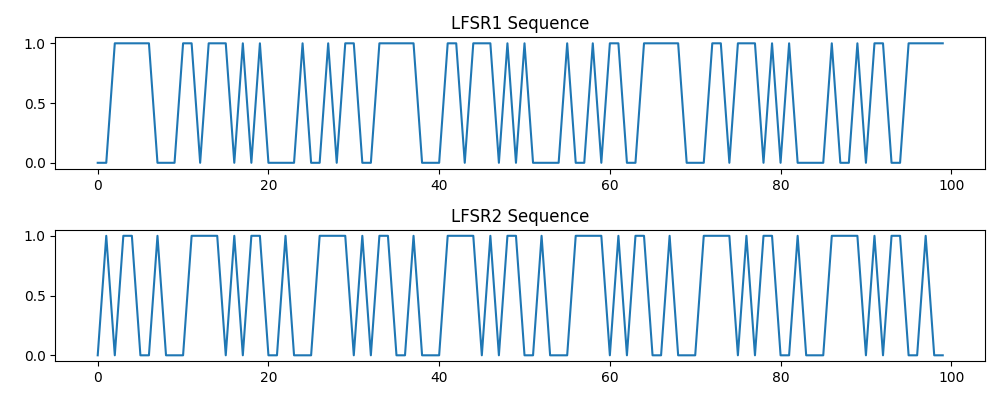

In [55]:
def build_keystream(lfsr1_poly, lfsr1_initstate, lfsr2_poly, lfsr2_initstate, keystream_length):
    """Generates a keystream using two LFSRs and XOR."""

    L1 = LFSR(fpoly=lfsr1_poly, initstate=lfsr1_initstate)
    L2 = LFSR(fpoly=lfsr2_poly, initstate=lfsr2_initstate)

    keystream = []
    for _ in range(keystream_length):
        bit1 = L1.next()
        bit2 = L2.next()
        keystream.append(bit1 ^ bit2)  # XOR operation

    return np.array(keystream)

def encrypt_decrypt(message, keystream):
    """Encrypts/decrypts a message using a keystream."""

    encrypted_message = message ^ keystream
    decrypted_message = encrypted_message ^ keystream
    return encrypted_message, decrypted_message


# Alice (Sender)
message = "Bonjour, Bob!".encode("utf-8")  # Convert string to bytes
message_bits = np.unpackbits(np.frombuffer(message, dtype=np.uint8))

# LFSR parameters (choose primitive polynomials and initial states)
lfsr1_poly = [5, 3]
lfsr1_initstate = [1, 1, 1, 0, 0]
lfsr2_poly = [4, 1]
lfsr2_initstate = [1, 0, 1, 0]

keystream = build_keystream(lfsr1_poly, lfsr1_initstate, lfsr2_poly, lfsr2_initstate, len(message_bits))
encrypted_message, _ = encrypt_decrypt(message_bits, keystream)

# Bob (Receiver)
decrypted_message, _ = encrypt_decrypt(encrypted_message, keystream) 
decrypted_bytes = np.packbits(decrypted_message).tobytes()
decrypted_string = decrypted_bytes.decode("utf-8", errors="ignore")  # Handle potential padding

print(f"Original Message: {message.decode('utf-8')}")
print(f"Encrypted Message (bits): {encrypted_message}")
print(f"Decrypted Message: {decrypted_string}")




# Example plot of LFSR sequences
%matplotlib widget  

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("LFSR1 Sequence")
plt.plot(LFSR(fpoly=lfsr1_poly, initstate=lfsr1_initstate).runKCycle(100))  # Run for 100 cycles
plt.subplot(2, 1, 2)
plt.title("LFSR2 Sequence")
plt.plot(LFSR(fpoly=lfsr2_poly, initstate=lfsr2_initstate).runKCycle(100))
plt.tight_layout()
plt.show()

### Question 11: Using the previous stream cipher, on the sender side, write a program that reads a file and encrypts the content of the file to provide a ciphertext that is stored in a new file. On the receiver side, read the ciphertext from the new file and decrypt the content of the file to retrieve the plaintext.


In [57]:

def build_keystream(lfsr1_poly, lfsr1_initstate, lfsr2_poly, lfsr2_initstate, keystream_length):
    """Generates a keystream of specified length."""
    L1 = LFSR(fpoly=lfsr1_poly, initstate=lfsr1_initstate)
    L2 = LFSR(fpoly=lfsr2_poly, initstate=lfsr2_initstate)
    keystream = []
    for _ in range(keystream_length):
        keystream.append(L1.next() ^ L2.next())
    return np.array(keystream)

def encrypt_file(input_filename, output_filename, keystream):
    """Encrypts a file using a keystream."""
    with open(input_filename, "rb") as infile, open(output_filename, "wb") as outfile:
        file_content = infile.read()
        file_bits = np.unpackbits(np.frombuffer(file_content, dtype=np.uint8))
        # Encrypting only up to file length
        encrypted_bits = file_bits ^ keystream[:len(file_bits)]  
        encrypted_bytes = np.packbits(encrypted_bits).tobytes()
        outfile.write(encrypted_bytes)


def decrypt_file(input_filename, output_filename, keystream):
    """Decrypts a file using a keystream."""
    with open(input_filename, "rb") as infile, open(output_filename, "wb") as outfile:
        encrypted_content = infile.read()
        encrypted_bits = np.unpackbits(np.frombuffer(encrypted_content, dtype=np.uint8))
        
        # Decryptign only up to file length
        decrypted_bits = encrypted_bits ^ keystream[:len(encrypted_bits)]  
        decrypted_bytes = np.packbits(decrypted_bits).tobytes()
        outfile.write(decrypted_bytes)




# LFSR parameters 
lfsr1_poly = [5, 3]
lfsr1_initstate = [1, 1, 1, 0, 0]
lfsr2_poly = [4, 1]
lfsr2_initstate = [1, 0, 1, 0]

input_filename = "plaintext.txt"
output_filename_encrypted = "ciphertext.bin"
output_filename_decrypted = "decrypted.txt"

# Alice (Encryption)
with open(input_filename, "rb") as f:
    file_size = len(f.read()) #Get file size in bytes
    keystream_length = file_size * 8 #Keystream length in bits

keystream = build_keystream(lfsr1_poly, lfsr1_initstate, lfsr2_poly, lfsr2_initstate, keystream_length) 
encrypt_file(input_filename, output_filename_encrypted, keystream)


# Bob (Decryption)
decrypt_file(output_filename_encrypted, output_filename_decrypted, keystream)

print(f"File '{input_filename}' encrypted to '{output_filename_encrypted}'")
print(f"File '{output_filename_encrypted}' decrypted to '{output_filename_decrypted}'")

# Verification (Optional): Check if the original and decrypted files are identical
with open(input_filename, "rb") as original_file, open(output_filename_decrypted, "rb") as decrypted_file:
  if original_file.read() == decrypted_file.read():
    print("Decryption successful: Original and decrypted files match.")
  else:
    print("Decryption failed: Original and decrypted files do not match.")

File 'plaintext.txt' encrypted to 'ciphertext.bin'
File 'ciphertext.bin' decrypted to 'decrypted.txt'
Decryption successful: Original and decrypted files match.
